# Name of the Student : Aagam Manish Shah

# USC ID Number: 8791018480

# 3.2 Tree-Based Methods

In [1]:
import os
import csv
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import sqrt, floor
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

## (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric. 

In [2]:
aps_train_data = pd.read_csv(r'aps_failure_training_set.csv',skiprows = 20)
aps_train_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
aps_test_data = pd.read_csv(r'aps_failure_test_set.csv', skiprows = 20)
aps_test_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


## (b) Data Preparation
## This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps. 

There are various ways to deal with the data with missing values. There are two types of imputation–single or multiple. Single Imputation method involves Mean Imputation, Hot Deck, Cold Deck, Substitution, Stochastic regression, Interpolation & extrapolation and Regression. While the multiple imputation technqiues include  single value regression analysis, monotonic imputation and chained equations or the Markov chain Monte Carlo (MCMC) method.I used only Simple Imputation here for the fact being conceptually simple and because the resulting sample has the same number of observations as the full data set. I am using Simple Mean Strategy Imputation technqiue to impute the missing data. In simple mean imputation, missing values are replaced by the mean for that variable.   

In [3]:
X_train = aps_train_data.iloc[:,1:]
y_train = aps_train_data.iloc[:,0]
X_train = X_train.replace('na', np.nan)
missing_columns = X_train.columns[X_train.isnull().any()]
print(X_train[missing_columns].describe())

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train_new = imputer.transform(X_train)
X_train_new = pd.DataFrame(X_train_new, columns = X_train.columns)

missing_columns = X_train_new.isnull().values.any()
missing_columns

       ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002 ag_003 ag_004  \
count   13671  56665  45139  57500  57500  59329  59329  59329  59329  59329   
unique     29   2061   1886    333    418    154    617   2422   7879  23071   
top         0      0      0      0      0      0      0      0      0      0   
freq    10977   8752   2009  55543  55476  59133  58587  56181  46894   1305   

        ... ee_002 ee_003 ee_004 ee_005 ee_006 ee_007 ee_008 ee_009 ef_000  \
count   ...  59329  59329  59329  59329  59329  59329  59329  59329  57276   
unique  ...  34488  31711  35188  36288  31795  30469  24213   9724     28   
top     ...      0      0      0      0      0      0      0      0      0   
freq    ...   1364   1557   1797   2814   4458   7898  17280  31863  57021   

       eg_000  
count   57277  
unique     49  
top         0  
freq    56794  

[4 rows x 169 columns]


False

In [5]:
X_test = aps_test_data.iloc[:,1:]
y_test = aps_test_data.iloc[:,0]
X_test = X_test.replace('na', np.nan)
missing_columns = X_test.columns[X_test.isnull().any()]
print(X_test[missing_columns].describe())

X_test_new = imputer.transform(X_test)
X_test_new = pd.DataFrame(X_test_new, columns = X_test.columns)

missing_columns = X_test_new.isnull().values.any()
missing_columns

       ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002 ag_003 ag_004  \
count    3637  15074  12019  15310  15310  15811  15811  15811  15811  15811   
unique     18   1311   1202    170    201     59    221    800   2835   8647   
top         0      0      0      0      0      0      0      0      0      0   
freq     2865   2289    519  14764  14741  15749  15575  14954  12442    340   

        ... ee_002 ee_003 ee_004 ee_005 ee_006 ee_007 ee_008 ee_009 ef_000  \
count   ...  15808  15808  15808  15808  15808  15808  15808  15808  15238   
unique  ...  11937  11038  11817  11915  10831  10271   8314   4042     12   
top     ...      0      0      0      0      0      0      0      0      0   
freq    ...    356    406    469    735   1151   2061   4500   8432  15167   

       eg_000  
count   15238  
unique     24  
top         0  
freq    15107  

[4 rows x 169 columns]


False

### ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean. 

In [6]:
coeff_of_var_formula =  lambda x: np.std(x) / np.mean(x)
cv_result = np.apply_along_axis(coeff_of_var_formula, axis=0, arr=X_train_new.to_numpy())
cv_result

array([  2.45091715,   2.32838058,   2.16974844, 183.8460883 ,
        23.19074341,  18.6587656 ,  91.87779897,  34.85465962,
        17.36899866,   8.54997778,   5.40143368,   2.92706769,
         2.34490753,   2.83346048,   6.15453179,  32.98407617,
         2.30016808,  18.01253164,  43.80145737,  74.5260669 ,
         9.0742952 ,   9.05859612,   2.23877812,   2.26013028,
         3.05913881,   2.83958803,  10.83695939,  86.4161837 ,
        23.45922929,  68.15998601,   5.77873675,   3.87753603,
        37.00925391,  52.23341648,  38.80925699,  28.41330475,
        33.37443788,  12.38403755,   3.02306245,   3.28421469,
         3.77561604,  83.78536479,   9.32826675,   7.6463558 ,
        13.14158342,   7.44591379,   2.81711666,   3.00804943,
         8.78083868,  16.04744938,  22.42558271,  76.96733666,
         2.68305412,   2.60870996,   2.87873171,   2.7160934 ,
         2.61599931,   2.67985343,   3.00724764,   2.81034518,
         6.75148907,   9.32142229,   2.39229943,   6.94

### iii. Plot a correlation matrix for your features using pandas or any other tool.

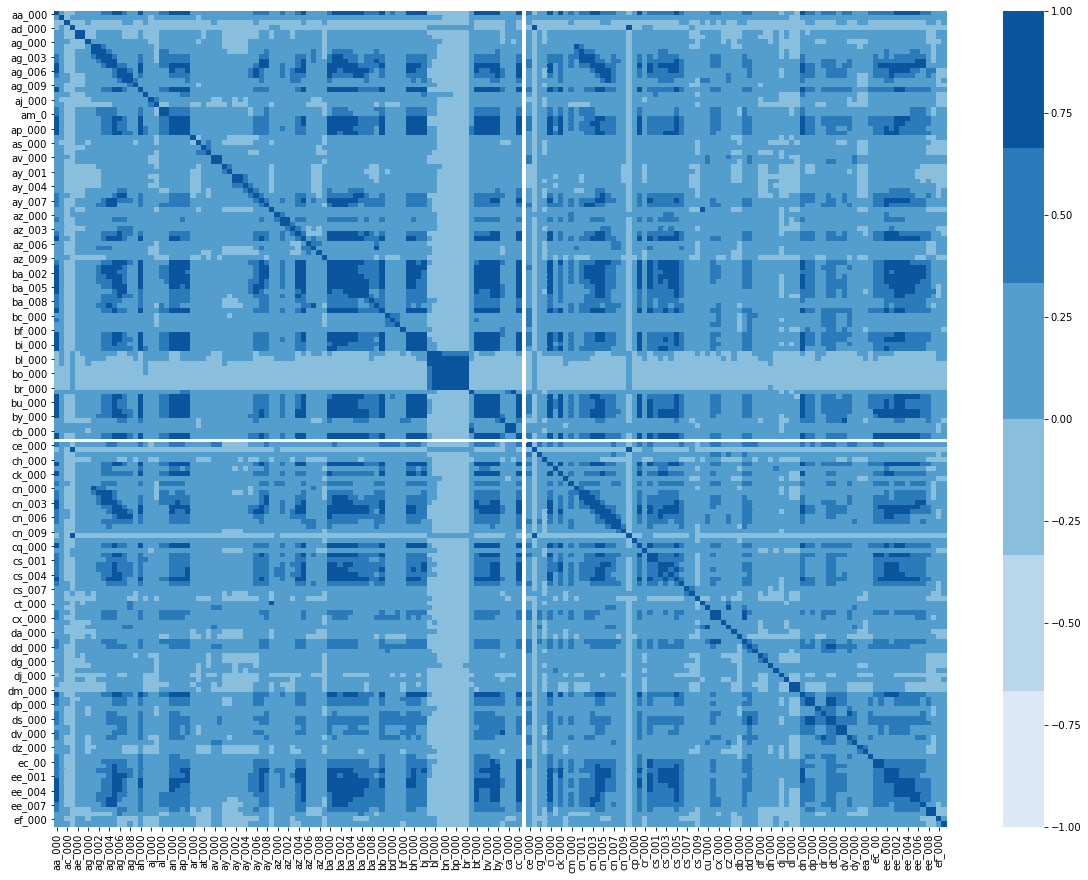

In [7]:
corrMatrix = X_train_new.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(corrMatrix, vmin=-1, vmax=1, cmap=sns.color_palette("Blues"))
plt.show()

### iv. Pick sqrt(170) features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization. 

Index(['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000',
       'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000'],
      dtype='object')


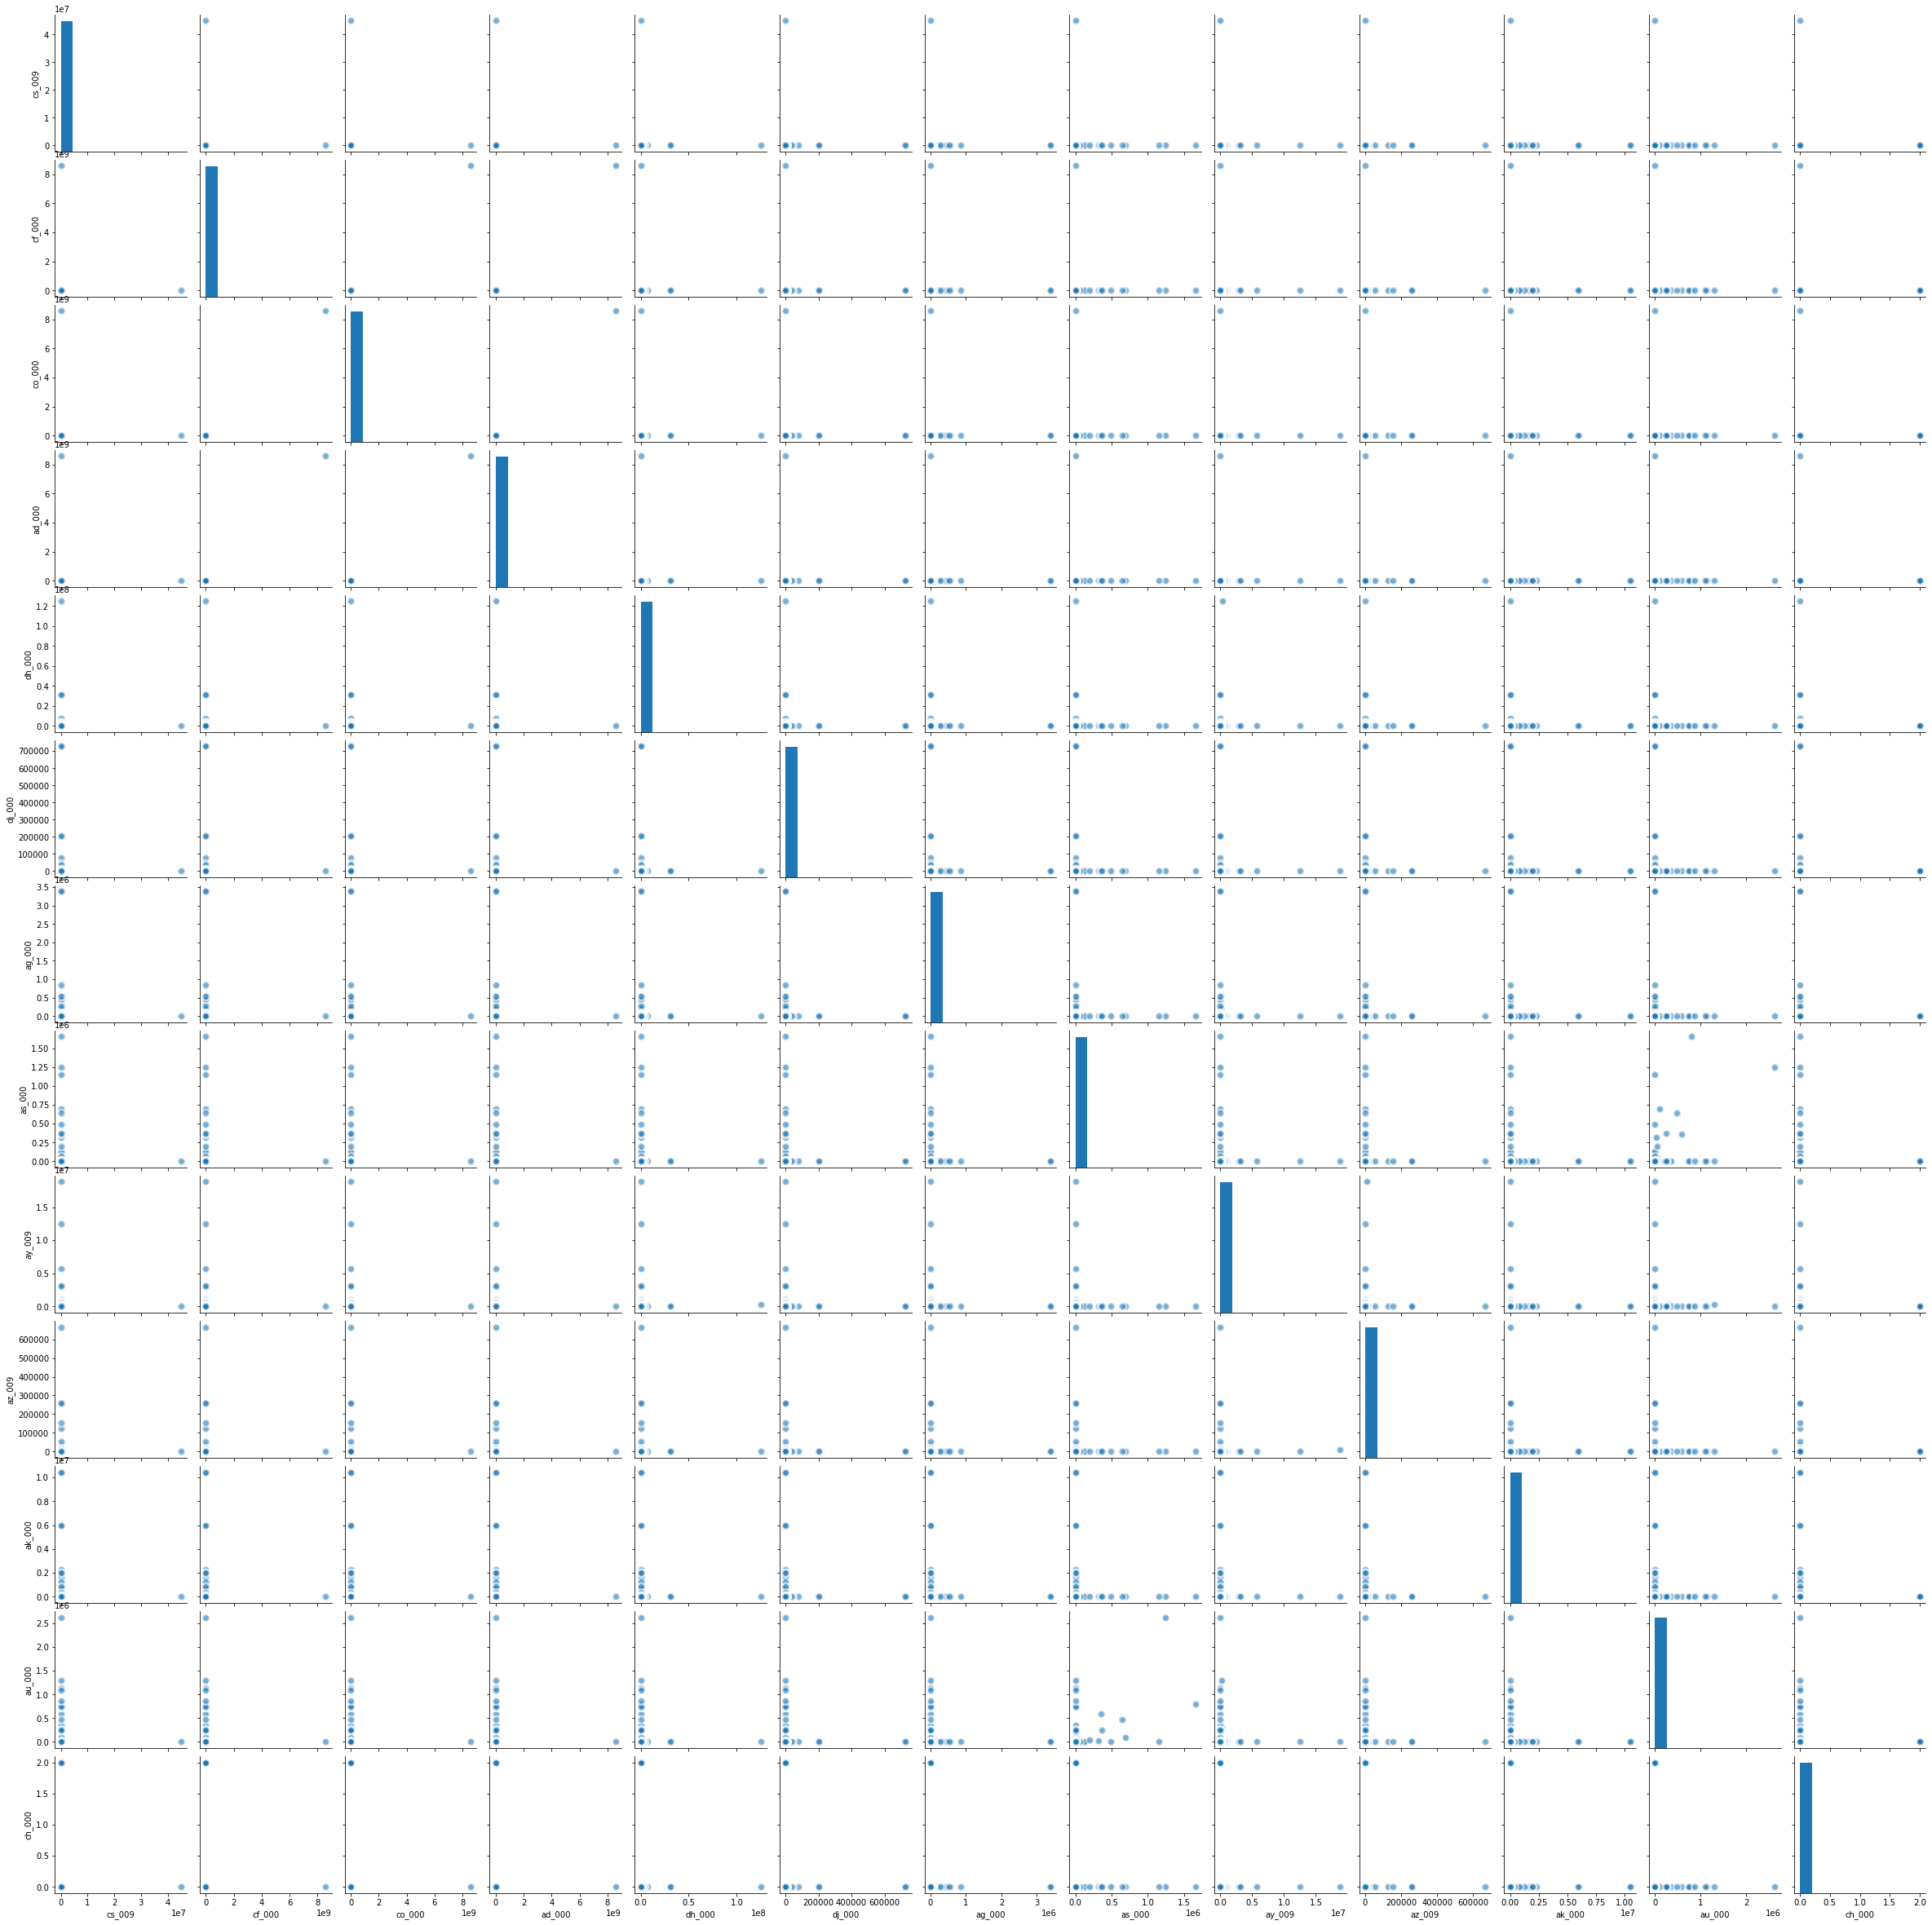

In [8]:
top_sqrt_170_features = floor(sqrt(170))
cv_resultIndexes = np.argsort(-cv_result)[:top_sqrt_170_features]
colname_highest_cv = X_train_new.columns[cv_resultIndexes]
high_cv_data = X_train_new[colname_highest_cv]
print(colname_highest_cv)
sns.pairplot(high_cv_data, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.6))
plt.show()

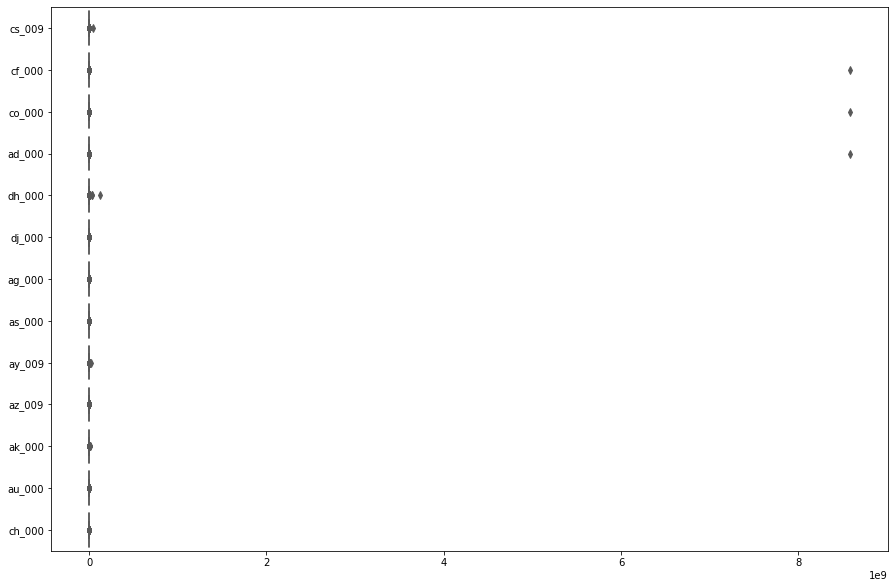

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(data=high_cv_data, orient="h", palette="Set2")

### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [10]:
lb_train = preprocessing.LabelBinarizer()
arr_train = lb_train.fit_transform(y_train)
neg_train = (arr_train == 0).sum()
pos_train = (arr_train == 1).sum()

lb_test = preprocessing.LabelBinarizer()
arr_test = lb_test.fit_transform(y_test)
neg_test = (arr_test == 0).sum()
pos_test = (arr_test == 1).sum()

print("The number of pos data is : ", pos_train + pos_test)
print("The number of neg data is : ", neg_train + neg_test)

The number of pos data is :  1375
The number of neg data is :  74625


In [11]:
aps_train_data['class'].replace('neg', 1,inplace=True)
aps_train_data['class'].replace('pos', 0,inplace=True)
aps_test_data['class'].replace('neg', 1,inplace=True)
aps_test_data['class'].replace('pos', 0,inplace=True)

In [12]:
y_train = aps_train_data.iloc[:,0]
y_test = aps_test_data.iloc[:,0]

## (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

[[  271   104]
 [   18 15607]]


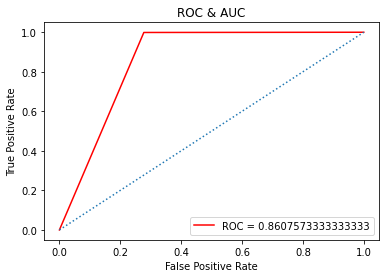

-----------"OOB Score"-------------
0.99375


In [13]:
randForestClf = RandomForestClassifier(n_estimators=50, random_state=2333, oob_score=True)
randForestClf.fit(X_train_new, y_train)

# Test Data
y_predict = randForestClf.predict(X_test_new)
print(confusion_matrix(y_test, y_predict))
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test, y_predict)
# Calculate Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("-----------\"OOB Score\"-------------")
print(randForestClf.oob_score_)

[[  999     1]
 [    0 59000]]


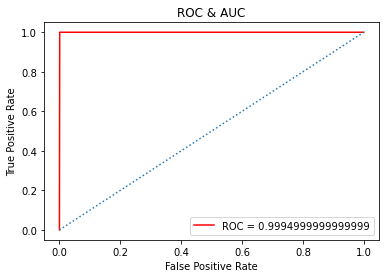

-----------"OOB Score"-------------
0.99375


In [14]:
# Train Data
y_pred = randForestClf.predict(X_train_new)
print(confusion_matrix(y_train,y_pred))
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_train, y_pred)
# Calculate Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("-----------\"OOB Score\"-------------")
print(randForestClf.oob_score_)

## (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c. 

Unbalanced data causes problems when building random forest. Random forest is buit on multiple decision trees, each of them uses a bag of the datapoints and a bag of features. Therefore, a bag of datapoints might contain a few or maybe none of the less prominent class, and make some decision tree biased. In sum, using random forest on unbalanced data is not a good chioce.

By using class_weight = "balanced" method

[[  221   154]
 [   19 15606]]


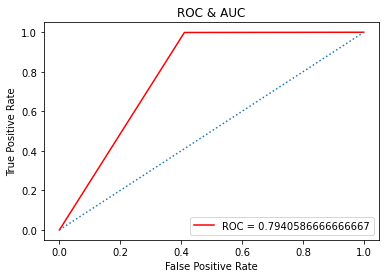

-----------"OOB Score"-------------
0.9921333333333333


In [15]:
randForestClf = RandomForestClassifier(n_estimators=50, random_state=2333, oob_score=True, class_weight="balanced")
randForestClf.fit(X_train_new, y_train)

# Test Data
y_predict = randForestClf.predict(X_test_new)
print(confusion_matrix(y_test, y_predict))
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test, y_predict)
# Calculate Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("-----------\"OOB Score\"-------------")
print(randForestClf.oob_score_)

[[  998     2]
 [    0 59000]]


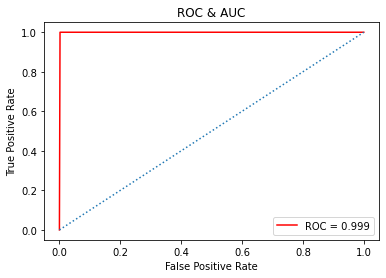

-----------"OOB Score"-------------
0.9921333333333333


In [16]:
# Train Data
y_pred = randForestClf.predict(X_train_new)
print(confusion_matrix(y_train,y_pred))
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_train, y_pred)
# Calculate Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("-----------\"OOB Score\"-------------")
print(randForestClf.oob_score_)

Building random forest on both unbalance and unbalance-compensating ways have different results. In short, with compensating the unbalanced data, we sacrifice our accuracy but get a better prediction on 'pos' class.

By using SMOTE method

-----------"After Using SMOTE: (Train)"-------------
1    59000
0    59000
Name: class, dtype: int64
-----------"After Using SMOTE: (Test)"-------------
1    15625
0    15625
Name: class, dtype: int64


C:\Users\12134\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


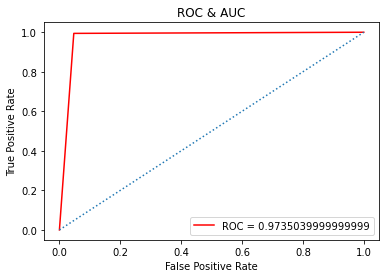

-----------"OOB Score"-------------
0.9966271186440678


In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2333)
smote_train_fit = smote.fit_sample(X_train_new, y_train)
smote_test_fit = smote.fit_sample(X_test_new, y_test)
X_train_smote = pd.DataFrame(smote_train_fit[0])
y_train_smote = pd.DataFrame(smote_train_fit[1], columns=['class'])
X_test_smote = pd.DataFrame(smote_test_fit[0])
y_test_smote = pd.DataFrame(smote_test_fit[1], columns=['class'])

print("-----------\"After Using SMOTE: (Train)\"-------------")
print(y_train_smote['class'].value_counts())
print("-----------\"After Using SMOTE: (Test)\"-------------")
print(y_test_smote['class'].value_counts())

randForestClf = RandomForestClassifier(n_estimators=50, random_state=2333, oob_score=True)
randForestClf.fit(X_train_smote, y_train_smote)
y_predict = randForestClf.predict(X_test_smote)
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test_smote, y_predict)
# Calculate Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("-----------\"OOB Score\"-------------")
print(randForestClf.oob_score_)

## (e) Model Trees
## In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has summation j BjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka7 to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [6]:
def to_binary_numeric(y_data, classNeg="neg"):
    if isinstance(y_data, pd.DataFrame):
        y_data = y_data.to_numpy()

    y_data = np.array([1 if x == classNeg else 0 for x in y_data])
    return pd.DataFrame(y_data)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\12134\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\12134\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\12134\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\12134\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\12134\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


Train CV (5-folds) Error = 0.84%
=== Confusion Matrix ===

     a     b   <-- classified as
 58842   158 |     a = neg
   348   652 |     b = pos

================="Summary"====================

Correctly Classified Instances       59494               99.1567 %
Incorrectly Classified Instances       506                0.8433 %
Kappa statistic                          0.7162
Mean absolute error                      0.0115
Root mean squared error                  0.084 
Relative absolute error                 34.9571 %
Root relative squared error             65.6408 %
Total Number of Instances            60000     



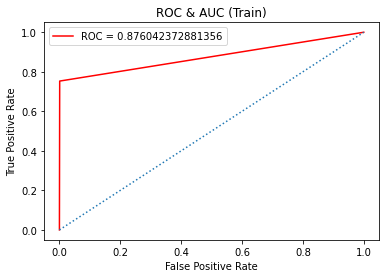

In [7]:
import weka.core.jvm as jvm

jvm.start()
import weka.core.converters as convert
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random

GENERATED_TRAIN_DATA_FILE_PATH = './gen_train_data_set.csv'

export_train_data = pd.concat([y_train, X_train_new], axis=1)
export_train_data.to_csv(GENERATED_TRAIN_DATA_FILE_PATH, sep=',', index=False)
train_data = convert.load_any_file(filename=GENERATED_TRAIN_DATA_FILE_PATH)
train_data.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_train_obj = Evaluation(train_data)
eval_train_obj.crossvalidate_model(classifier=log_tree, data=train_data, num_folds=5, rnd=Random(1))
print("Train CV (5-folds) Error = %.2f%%" % (eval_train_obj.percent_incorrect))
print(eval_train_obj.matrix())
print("=================\"Summary\"====================")
print(eval_train_obj.summary())

log_tree.build_classifier(train_data)
y_predict = eval_train_obj.test_model(log_tree, train_data)
y_train = to_binary_numeric(y_train, classNeg="neg")
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_train, y_predict, pos_label=0)

# Calculate Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (Train)')
plt.legend()
plt.show()

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


Test CV (5-folds) Error = 1.21%
=== Confusion Matrix ===

     a     b   <-- classified as
 15565    60 |     a = neg
   133   242 |     b = pos

================="Summary"====================

Correctly Classified Instances       15807               98.7938 %
Incorrectly Classified Instances       193                1.2063 %
Kappa statistic                          0.7088
Mean absolute error                      0.0174
Root mean squared error                  0.0975
Relative absolute error                 37.9746 %
Root relative squared error             64.4468 %
Total Number of Instances            16000     



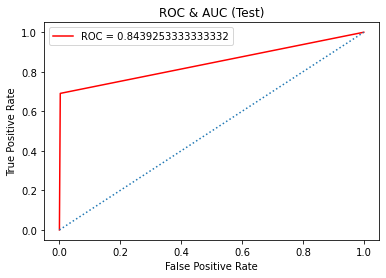

In [8]:
import weka.core.jvm as jvm

jvm.start()
import weka.core.converters as convert
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random

GENERATED_TEST_DATA_FILE_PATH = './gen_test_data_set.csv'

export_test_data = pd.concat([y_test, X_test_new], axis=1)
export_test_data.to_csv(GENERATED_TEST_DATA_FILE_PATH, sep=',', index=False)
test_data = convert.load_any_file(filename=GENERATED_TEST_DATA_FILE_PATH)
test_data.class_is_first()

log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_test_obj = Evaluation(test_data)
eval_test_obj.crossvalidate_model(classifier=log_tree, data=test_data, num_folds=5, rnd=Random(1))
print("Test CV (5-folds) Error = %.2f%%" % (eval_test_obj.percent_incorrect))
print(eval_test_obj.matrix())
print("=================\"Summary\"====================")
print(eval_test_obj.summary())

log_tree.build_classifier(test_data)
y_predict = eval_test_obj.test_model(log_tree, test_data)
y_test = to_binary_numeric(y_test, classNeg="neg")
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test, y_predict, pos_label=0)

# Calculate Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (Test)')
plt.legend()
plt.show()

## (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\12134\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\12134\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\12134\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\12134\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\12134\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


SMOTE Train CV (5-folds) Error = 1.24%
=== Confusion Matrix ===

     a     b   <-- classified as
 58059   941 |     a = neg
   526 58474 |     b = pos

================="Summary"====================

Correctly Classified Instances      116533               98.7568 %
Incorrectly Classified Instances      1467                1.2432 %
Kappa statistic                          0.9751
Mean absolute error                      0.0205
Root mean squared error                  0.1033
Relative absolute error                  4.1067 %
Root relative squared error             20.6694 %
Total Number of Instances           118000     



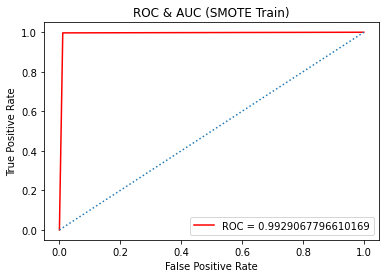

In [7]:
from imblearn.over_sampling import SMOTE
import weka.core.jvm as jvm

jvm.start()
import weka.core.converters as convert
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random

GENERATED_SMOTE_TRAIN_DATA_FILE_PATH = './gen_smote_train_data_set.csv'

smote = SMOTE(random_state=2333)
smote_train_fit = smote.fit_sample(X_train_new, y_train)
X_train_smote = pd.DataFrame(smote_train_fit[0])
y_train_smote = pd.DataFrame(smote_train_fit[1], columns=['class'])
export_smote_train_data = pd.concat([y_train_smote, X_train_smote], axis=1)

export_smote_train_data.to_csv(GENERATED_SMOTE_TRAIN_DATA_FILE_PATH, sep=',', index=False)
smote_train_data = convert.load_any_file(filename=GENERATED_SMOTE_TRAIN_DATA_FILE_PATH)
smote_train_data.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_smote_train_obj = Evaluation(smote_train_data)
eval_smote_train_obj.crossvalidate_model(classifier=log_tree, data=smote_train_data, num_folds=5, rnd=Random(1))
print("SMOTE Train CV (5-folds) Error = %.2f%%" % (eval_smote_train_obj.percent_incorrect))
print(eval_smote_train_obj.matrix())
print("=================\"Summary\"====================")
print(eval_smote_train_obj.summary())

log_tree.build_classifier(smote_train_data)
y_predict = eval_smote_train_obj.test_model(log_tree, smote_train_data)
y_train_smote = to_binary_numeric(y_train_smote, classNeg="neg")
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_train_smote, y_predict, pos_label=0)

# Calculate Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (SMOTE Train)')
plt.legend()
plt.show()

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


SMOTE Test CV (5-folds) Error = 0.95%
=== Confusion Matrix ===

     a     b   <-- classified as
 15373   252 |     a = neg
    46 15579 |     b = pos

================="Summary"====================

Correctly Classified Instances       30952               99.0464 %
Incorrectly Classified Instances       298                0.9536 %
Kappa statistic                          0.9809
Mean absolute error                      0.017 
Root mean squared error                  0.0915
Relative absolute error                  3.3957 %
Root relative squared error             18.3035 %
Total Number of Instances            31250     



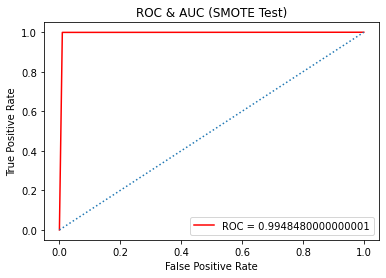

In [8]:
from imblearn.over_sampling import SMOTE
import weka.core.jvm as jvm

jvm.start()
import weka.core.converters as convert
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random

GENERATED_SMOTE_TEST_DATA_FILE_PATH = './gen_smote_test_data_set.csv'

smote = SMOTE(random_state=2333)
smote_test_fit = smote.fit_sample(X_test_new, y_test)
X_test_smote = pd.DataFrame(smote_test_fit[0])
y_test_smote = pd.DataFrame(smote_test_fit[1], columns=['class'])
export_smote_test_data = pd.concat([y_test_smote, X_test_smote], axis=1)

# export data to csv
export_smote_test_data.to_csv(GENERATED_SMOTE_TEST_DATA_FILE_PATH, sep=',', index=False)
smote_test_data = convert.load_any_file(filename=GENERATED_SMOTE_TEST_DATA_FILE_PATH)
smote_test_data.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_smote_test_obj = Evaluation(smote_test_data)
eval_smote_test_obj.crossvalidate_model(classifier=log_tree, data=smote_test_data, num_folds=5, rnd=Random(1))
print("SMOTE Test CV (5-folds) Error = %.2f%%" % (eval_smote_test_obj.percent_incorrect))
print(eval_smote_test_obj.matrix())
print("=================\"Summary\"====================")
print(eval_smote_test_obj.summary())

log_tree.build_classifier(smote_test_data)
y_predict = eval_smote_test_obj.test_model(log_tree, smote_test_data)
y_test_smote = to_binary_numeric(y_test_smote, classNeg="neg")
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test_smote, y_predict, pos_label=0)

# Calculate Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (SMOTE Test)')
plt.legend()
plt.show()